In [1]:
using Luxor, LightXML

In [2]:
function textlabel!(parent, txt::AbstractString, pos::Point; xoffset::Number=0, yoffset::Number=0)
    x = pos.x + xoffset + top_left_corner.x
    y = pos.y + yoffset + top_left_corner.y
    elem = new_child(parent, "text")
    add_text(elem, txt)
    set_attributes(elem, Dict("class"=>"math", "x"=>string(x, "pt"), "y"=>string(y, "pt")))
    return nothing
end;

function myarrow(p3d, p2d)
    arrow(first(p2d), last(p2d), linewidth=linewidth)
end

myarrow (generic function with 1 method)

In [3]:
pointradius = 10
linewidth = 2;

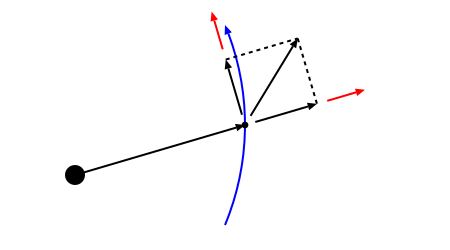

In [38]:
drawing_height = 250
Drawing(450, drawing_height, :svg)
origin()

chord = 100
arcend1 = Point(0, -chord)
arcend2 = Point(0, chord)
arcsagitta = 20
radius = (arcsagitta^2 + chord^2) / (2 * arcsagitta)
centerpoint = Point(-radius + arcsagitta, 0)
halfangle = asin(chord / radius)

m1 = Point(-150, 50)
m2 = O + Point(arcsagitta, 0)
slopeofr = slope(m1, m2) # rad

hypot = 75
vp_short = 1.1
ur_short = 1.5
vr = m2 + Point(hypot*cos(slopeofr), hypot*sin(slopeofr))
ur = vr + Point(hypot/ur_short*cos(slopeofr), hypot/ur_short*sin(slopeofr))
vp = m2 + Point(hypot/vp_short*sin(slopeofr), -hypot/vp_short*cos(slopeofr))
up = vp + Point(hypot/ur_short*sin(slopeofr), -hypot/ur_short*cos(slopeofr))
outsidecorner = Point(vp.x + hypot*cos(slopeofr), vr.y - hypot/vp_short*cos(slopeofr))

slopeofrdot = slope(m2, outsidecorner)

# arc2sagitta(arcend1, arcend2, arcsagitta, :stroke)
setcolor("blue")
arrow(centerpoint, radius, halfangle, -halfangle, linewidth=linewidth, clockwise=false)

setcolor("black")
circle(m1, pointradius, :fill)
circle(m2, pointradius/3, :fill)
arrow(m1, m2, linewidth=linewidth)
shorten = hypot/7
arrow(m2 + Point(shorten*cos(slopeofr), shorten*sin(slopeofr)), vr, linewidth=linewidth)
arrow(m2 + Point(shorten*sin(slopeofr), -shorten*cos(slopeofr)), vp, linewidth=linewidth)
arrow(m2 + Point(shorten*cos(slopeofrdot), shorten*sin(slopeofrdot)), outsidecorner, linewidth=linewidth)

setcolor("red")
arrow(vr + Point(shorten*cos(slopeofr), shorten*sin(slopeofr)), ur, linewidth=linewidth)
arrow(vp + Point(shorten*sin(slopeofr), -shorten*cos(slopeofr)), up, linewidth=linewidth)

setcolor("black")
setdash("dash")
line(vp, outsidecorner, :stroke)
line(outsidecorner, vr, :stroke)

top_left_corner = getworldposition(Point(0, 0), centered=false)
finish()
preview()

In [39]:
svg_out = svgstring();
xdoc = parse_string(svg_out)
xroot = root(xdoc);

In [40]:
textlabel!(xroot, "\\boldsymbol{r}", between(m1, m2, 0.4), yoffset=-45)
textlabel!(xroot, "\\dot{\\boldsymbol{r}}_1", outsidecorner, xoffset=-70, yoffset=-25)
textlabel!(xroot, "\\text{Path of } m_2", arcend2, xoffset=-50, yoffset=-50)
textlabel!(xroot, "m_1", m1, xoffset=-20, yoffset=-30)
textlabel!(xroot, "m_2", m2, xoffset=-60, yoffset=-25)
textlabel!(xroot, "v_r", vr, xoffset=-95, yoffset=-15)
textlabel!(xroot, "v_{\\perp}", vp, xoffset=-70, yoffset=-10)
textlabel!(xroot, "\\hat{\\boldsymbol{u}}_{r}", ur, xoffset=-90, yoffset=-20)
textlabel!(xroot, "\\hat{\\boldsymbol{u}}_{\\perp}", up, xoffset=-70, yoffset=-10)


In [41]:
save_file(xdoc, "../raw_svg/definition-of-vr-vp.svg");